## Interaction type : Phosphorylate

In [1]:
path = '/Volumes/GoogleDrive/My Drive/_My Data Analytics Exercise/Exercise/Biopython/TRIMS/'

In [2]:
phrases = ['phosphorylate','dephosphorylate', 'ubiquitinate', 'deubiquitinate', 'sumoylate', 'desumoylate', 'hydroxylate', 'dehydroxylate', 'acetylate',
 'deacetylate', 'glycosylate', 'deglycosylate', 'farnesylate', 'defarnesylate', 'geranylgeranylate', 'degeranylgeranylate',
 'palmitoylate', 'depalmitoylate', 'myristoylate', 'demyristoylate', 'ribosylate', 'deribosylate', 'methylate',
 'demethylate', 'autophosphorylate', 'transphosphorylate']


In [3]:
# Sample to check the behavior on how to compartmentalize a sentence
f = open(path+'phosphorylate_pubmed.txt', 'r')
lines = f.readlines()

In [4]:
collect = []
for l in lines:
    sentences = l.split('.')
    for sent in sentences:
        if 'phosphorylate' in sent:
            collect.append(sent.strip()+'.')

In [5]:
len(collect)

15795

In [6]:
import BMTextTokenizer as bmt
import stanza
import time
pretokenized_nlp = stanza.Pipeline(lang='en', package='craft', processor='tokenize', tokenize_pretokenized=True) 
%matplotlib inline

2022-02-12 09:05:59 INFO: Loading these models for language: en (English):
| Processor | Package    |
--------------------------
| tokenize  | craft      |
| pos       | craft      |
| lemma     | craft      |
| depparse  | craft      |
| ner       | bionlp13cg |

2022-02-12 09:05:59 INFO: Use device: cpu
2022-02-12 09:05:59 INFO: Loading: tokenize
2022-02-12 09:05:59 INFO: Loading: pos
2022-02-12 09:05:59 INFO: Loading: lemma
2022-02-12 09:05:59 INFO: Loading: depparse
2022-02-12 09:05:59 INFO: Loading: ner
2022-02-12 09:06:00 INFO: Done loading processors!
2022-02-12 09:06:00 INFO: Loading these models for language: en (English):
| Processor | Package |
-----------------------
| tokenize  | craft   |
| pos       | craft   |
| lemma     | craft   |
| depparse  | craft   |

2022-02-12 09:06:00 INFO: Use device: cpu
2022-02-12 09:06:00 INFO: Loading: tokenize
2022-02-12 09:06:00 INFO: Loading: pos
2022-02-12 09:06:00 INFO: Loading: lemma
2022-02-12 09:06:00 INFO: Loading: depparse
2022-

In [7]:
s = collect[0]
s

'While calmodulin kinase II (CaMKII) is known to phosphorylate and induce extranuclear translocation of HDAC5, KN-62, an inhibitor of CaMKII lowered the expression of the sclerostin gene in Ocy454 cells.'

While calmodulin kinase II (CaMKII) is known to phosphorylate and induce extranuclear translocation of HDAC5, KN-62, an inhibitor of CaMKII lowered the expression of the sclerostin gene in Ocy454 cells.
********************** Convergence ***************************
Prev size: 34 Vs. Next size 29
Prev size: 29 Vs. Next size 28
Prev size: 28 Vs. Next size 27
Prev size: 27 Vs. Next size 27
************************ ReTokenized *************************
id: 1	word: While                    	upos: SCONJ 	head: is known                 
id: 2	word: calmodulin kinase II CaMKII	upos: NOUN  	head: is known                 
id: 3	word: is known                 	upos: VERB  	head: lowered                  
id: 4	word: to                       	upos: PART  	head: phosphorylate            
id: 5	word: phosphorylate            	upos: VERB  	head: is known                 
id: 6	word: and                      	upos: CONJ  	head: induce                   
id: 7	word: induce                   	upos: VER

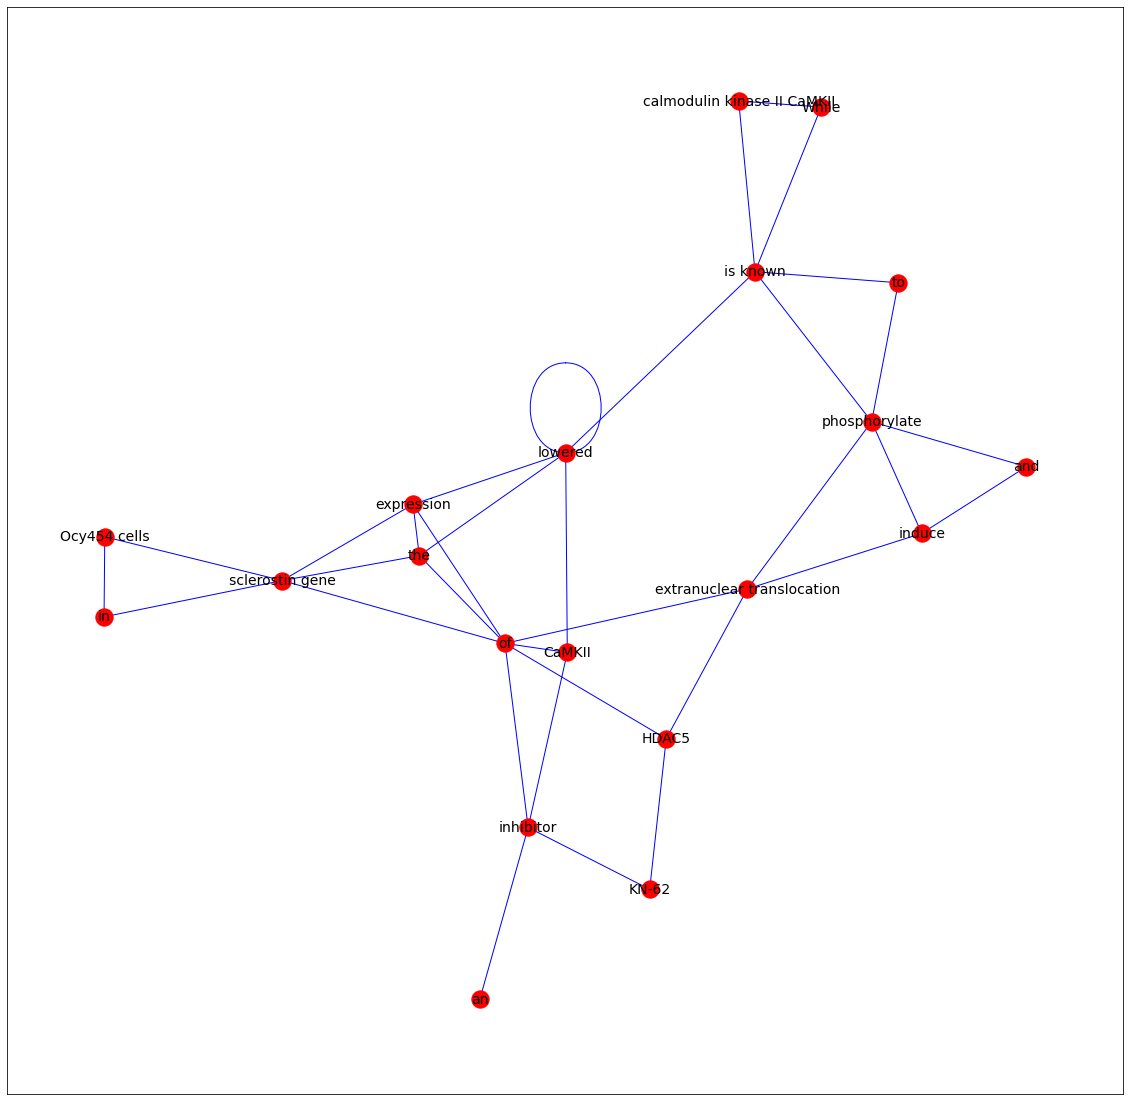

In [8]:
bmt.sandboxGP02(s)

In [10]:
doc = bmt.dynamicTokenizer(nlp=pretokenized_nlp, text=s)

Prev size: 34 Vs. Next size 29
Prev size: 29 Vs. Next size 28
Prev size: 28 Vs. Next size 27
Prev size: 27 Vs. Next size 27


In [17]:
H = bmt.createTokenDiGraphwithContractionGP02(doc)

In [18]:
def extractEntitiesfmRaw(doc):
    """ 
    extract entities that are of potential interests to uncover their relationship 
    input: a stanza processed doc
    output: a list of tokens
    """
    potential_ents = []
    for sent in doc.sentences:
        for word in sent.words:
            if word.upos == 'NOUN':
                potential_ents.append(word.text)
    return potential_ents

In [19]:
ents = extractEntitiesfmRaw(doc)
ents

['calmodulin kinase II CaMKII',
 'extranuclear translocation',
 'HDAC5',
 'KN-62',
 'inhibitor',
 'CaMKII',
 'expression',
 'sclerostin gene',
 'Ocy454 cells']

In [20]:
paths = bmt.generateSimplePath(H, ents)

In [21]:
import networkx as nx
pos = nx.get_node_attributes(H,'pos')
pos

{'While': 'SCONJ',
 'calmodulin kinase II CaMKII': 'NOUN',
 'is known': 'VERB',
 'to': 'PART',
 'phosphorylate': 'VERB',
 'and': 'CONJ',
 'induce': 'VERB',
 'extranuclear translocation': 'NOUN',
 'of': 'ADP',
 'HDAC5': 'NOUN',
 'an': 'DET',
 'inhibitor': 'NOUN',
 'CaMKII': 'NOUN',
 'lowered': 'VERB',
 'the': 'DET',
 'expression': 'NOUN',
 'sclerostin gene': 'NOUN',
 'in': 'ADP',
 'Ocy454 cells': 'NOUN',
 'KN-62': 'NOUN'}

### Trial on how to extact FOL based on different Graph Characteristics 

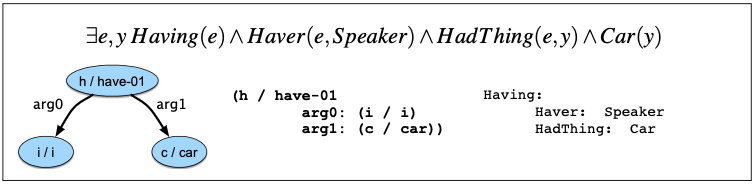

In [22]:
# How First-Order Logic of a sentence is presented
from IPython.display import display, Image
display(Image(filename='/Users/simontse/Desktop/First-Order Logic.png')) # Example from Speech and Language Porcessing by Dan Jurafsky and James H. Martin

calmodulin kinase II CaMKII has While as neighbor
calmodulin kinase II CaMKII has is known as neighbor

extranuclear translocation has induce as neighbor
extranuclear translocation has of as neighbor
extranuclear translocation has HDAC5 as neighbor

HDAC5 has of as neighbor
HDAC5 has KN-62 as neighbor

inhibitor has an as neighbor
inhibitor has of as neighbor
inhibitor has CaMKII as neighbor

CaMKII has of as neighbor
CaMKII has lowered as neighbor

expression has the as neighbor
expression has of as neighbor
expression has sclerostin gene as neighbor

sclerostin gene has the as neighbor
sclerostin gene has in as neighbor
sclerostin gene has of as neighbor
sclerostin gene has Ocy454 cells as neighbor

Ocy454 cells has in as neighbor

KN-62 has inhibitor as neighbor



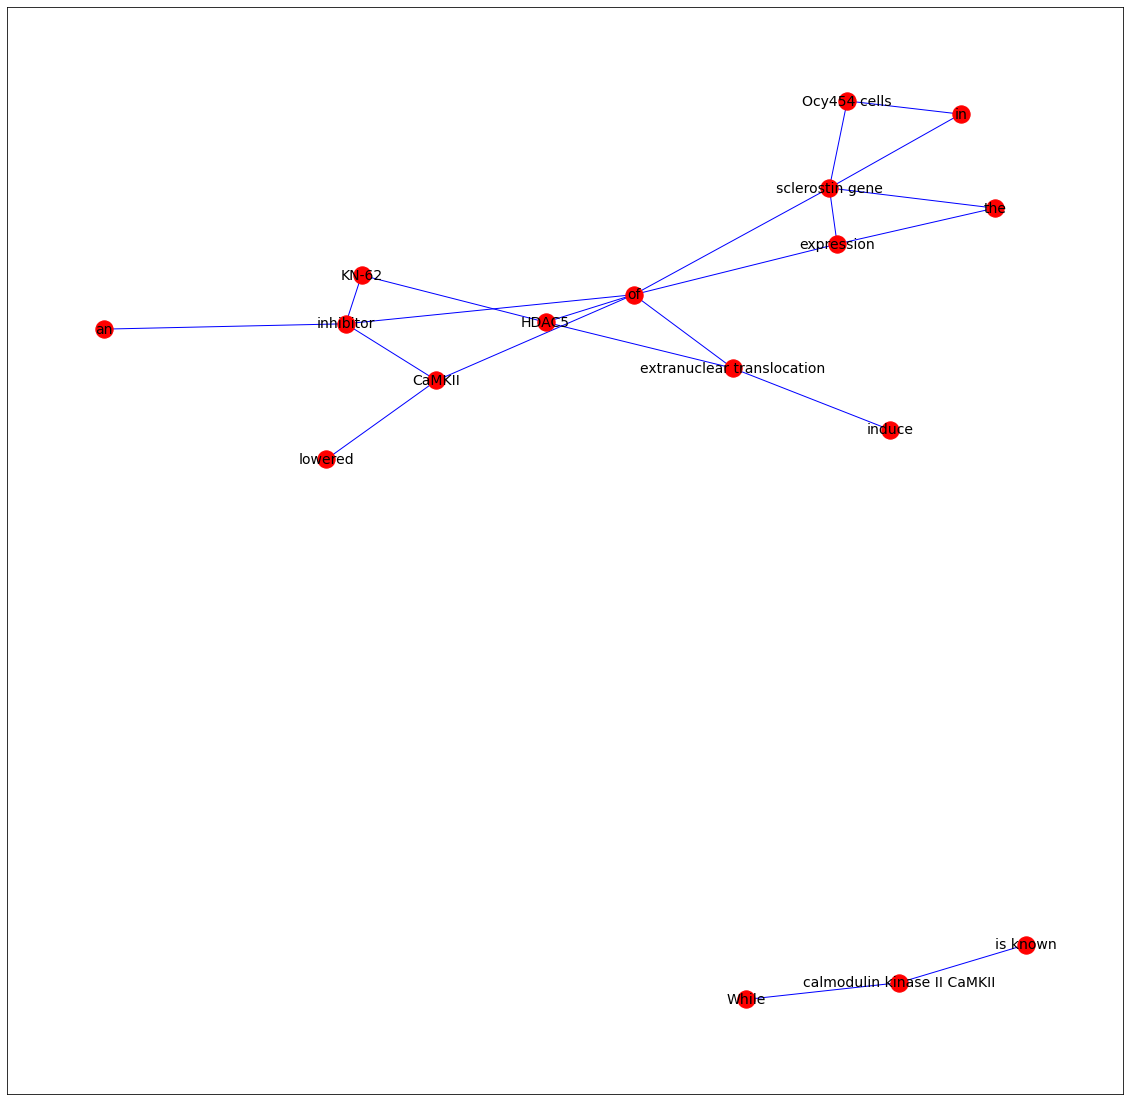

CPU times: user 252 ms, sys: 57.1 ms, total: 309 ms
Wall time: 128 ms


In [40]:
%%time
i = nx.Graph()
pos = nx.get_node_attributes(H,'pos')
for node, value in pos.items():
    if value == 'NOUN':
        neighbors = H.neighbors(node)
        for n in neighbors:
            print (node,'has %s as neighbor' %n)
            i.add_edge(n,node,weight=1)
        print ()
bmt.plot_network(i)

In [44]:
from networkx.generators.ego import ego_graph

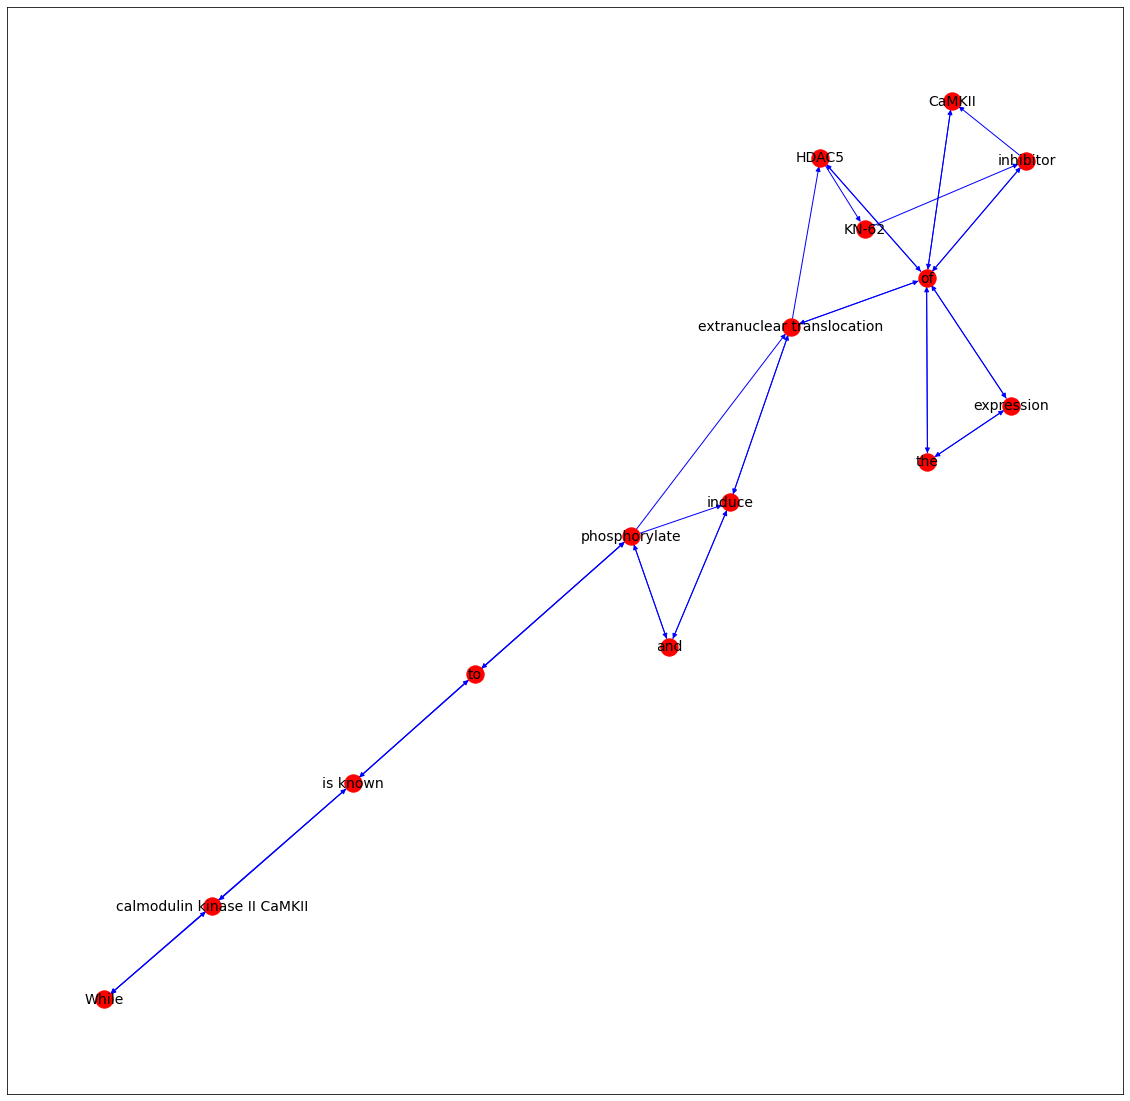

calmodulin kinase II CaMKII
extranuclear translocation
HDAC5
inhibitor
CaMKII
expression
KN-62


(15, 20)

In [49]:
G = ego_graph(H, n='phosphorylate', radius=3) # demonstration
phosphorylate_keyword = ['phosphorylate']
bmt.plot_network(G)
pos = nx.get_node_attributes(G, 'pos')
for key, value in pos.items():
    if value=='NOUN':
        print (key)
        phosphorylate_keyword.append(key)
len(G.nodes), len(H.nodes)

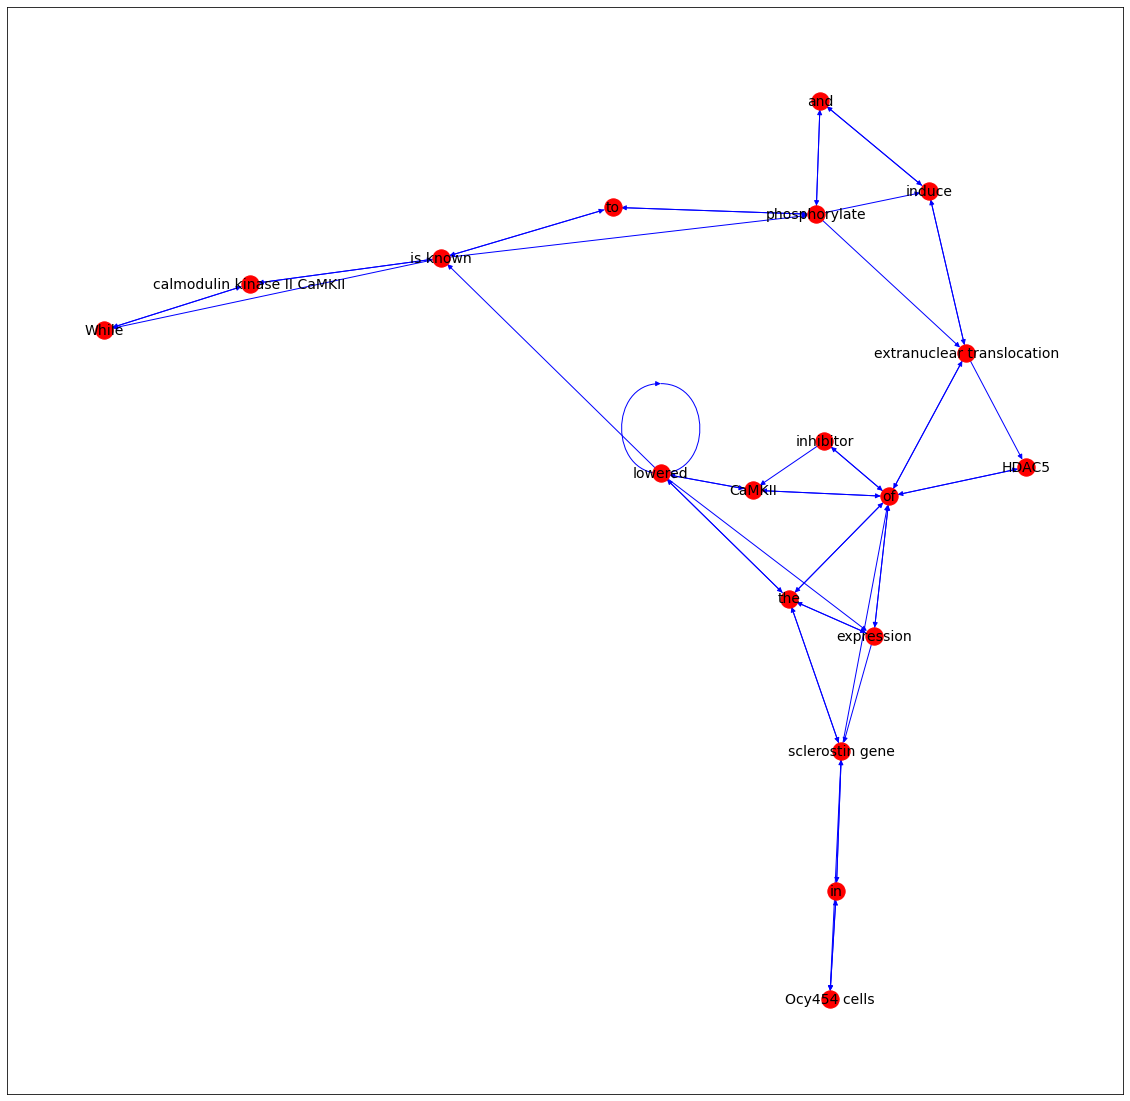

calmodulin kinase II CaMKII
extranuclear translocation
HDAC5
inhibitor
CaMKII
expression
sclerostin gene
Ocy454 cells


(18, 20)

In [51]:
lowered_keyword = ['lowered']
G = ego_graph(H, n='lowered', radius=3) # demonstration
bmt.plot_network(G)
pos = nx.get_node_attributes(G, 'pos')
for key, value in pos.items():
    if value=='NOUN':
        print (key)
        lowered_keyword.append(key)
len(G.nodes), len(H.nodes)

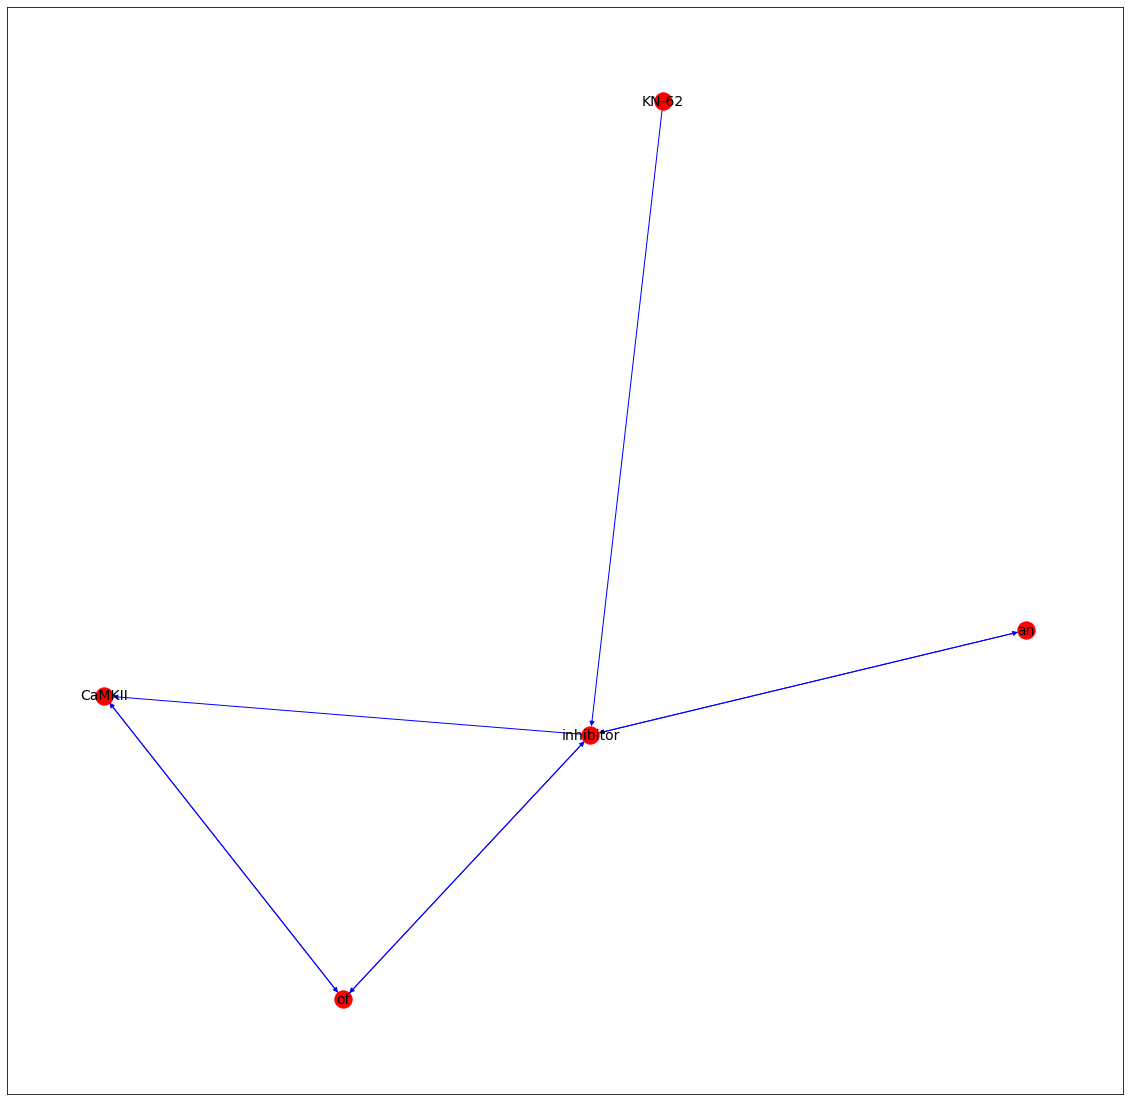

CaMKII
KN-62
inhibitor


(5, 20)

In [55]:
KN62_keyword = ['KN-62']
G = ego_graph(H, n='KN-62', radius=2) # demonstration
bmt.plot_network(G)
pos = nx.get_node_attributes(G, 'pos')
for key, value in pos.items():
    if value=='NOUN':
        print (key)
        KN62_keyword.append(key)
len(G.nodes), len(H.nodes)

In [56]:
%%time
for sent in doc.sentences:
    for word in sent.words:
        for k in phosphorylate_keyword:
            if k==word.text:
                print (k, '@ pos', word.id)
print ()

calmodulin kinase II CaMKII @ pos 2
phosphorylate @ pos 5
extranuclear translocation @ pos 8
HDAC5 @ pos 10
KN-62 @ pos 12
inhibitor @ pos 15
CaMKII @ pos 17
expression @ pos 20

CPU times: user 1.27 ms, sys: 649 µs, total: 1.92 ms
Wall time: 1.52 ms


In [57]:
%%time
for sent in doc.sentences:
    for word in sent.words:
        for k in lowered_keyword:
            if k==word.text:
                print (k, '@ pos', word.id)
print () # Somehow this left out the most import entity, KN-62, in the whole extraction

calmodulin kinase II CaMKII @ pos 2
extranuclear translocation @ pos 8
HDAC5 @ pos 10
inhibitor @ pos 15
CaMKII @ pos 17
lowered @ pos 18
expression @ pos 20
sclerostin gene @ pos 23
Ocy454 cells @ pos 25

CPU times: user 1.35 ms, sys: 705 µs, total: 2.06 ms
Wall time: 1.6 ms


In [58]:
%%time
for sent in doc.sentences:
    for word in sent.words:
        for k in KN62_keyword:
            if k==word.text:
                print (k, '@ pos', word.id)
print () 

KN-62 @ pos 12
KN-62 @ pos 12
inhibitor @ pos 15
CaMKII @ pos 17

CPU times: user 1.08 ms, sys: 470 µs, total: 1.55 ms
Wall time: 1.26 ms


Observations:
1. Raw tokenization based on POS is too fine for extraction of any meaningful relationship.  It doesn't reflect the way human being interprets text.  So retokenization to 'coarser' degree is needed.
2. Local feature such as neighbour of entity of interest is important.  However, it's hard to determine how 'local' it has to be before it becomes meaningful.
3. Global feature such as dependency/constituency of entity of interest could lead to misleading interpretation.  Therefore, a balance between global and local features is much needed.
4. How to handle clause/phrase of a long sentence is something that has to investigate.